In [ ]:

import src.analysis
from src.analysis import get_dataframe, state_process

DATASET = 'jun'  # 'juan' or 'jun'
FILENAME = 'data/test_%s.tsv' % DATASET

# we will split our dataset into smaller datasets to generate descriptive statistics
BUCKET_BOUNDARIES = [0, 1, 10, 100, 500, 1000, 10000, 100000]
BUCKET_LABELS = ['0', '1-10', '11-100', '101-500', '501-1000', '1001-10000', '10001-100000']

DATAFRAME_COLUMNS = ['filetype', 'extension', 'blocks', 'birthtime', 'alive_for_periods', 'is_dead']
EXTENSION_COL = DATAFRAME_COLUMNS[1]
BIRTHTIME_COL = DATAFRAME_COLUMNS[3]
ALIVE_FOR_COL = DATAFRAME_COLUMNS[4]
IS_DEAD_COL = DATAFRAME_COLUMNS[5]

# not included in the list because this one is not present in the original .tsv and the primary purpose of the list is
# to name the columns in that .tsv. In other words, these are columns we generate for later
# processing
BLOCKSIZE_CATEGORY_COL = 'blocksize_category'
TOTAL_LIFETIME_COL = 'lifetime'
TOTAL_LIFETIME_DAYS_COL = 'lifetime_days'
ALIVE_OBSERVED_MINUTES_COL = 'alive_for_minutes'

PREPROCESSED_SUFFIX = '_preprocessed.tsv'

verbose = False

start_time = 1520451300  # 03/07/2018 2:30 PM
end_time = 1520550000  # 03/08/2018 06:00 PM

preprocessed_fname = FILENAME + PREPROCESSED_SUFFIX

# Get the main dataframe
df_all = get_dataframe(state_process, preprocessed_fname)


We define multiple threshold to split our datasets in: the files whose lifetimes were under three years, whose lifetimes were under ten years, and whose lifetimes were 48 years, or files whose birthtimes were timestamp 0 (which there are some)

In [13]:
years_twoandahalf = int(365 * 2.5)  # for filtering old files
years_three = 365 * 3
years_five = 365 * 5
years_ten = 365 * 10
years_unix_0 = 17600

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1138967f0>]],
      dtype=object)

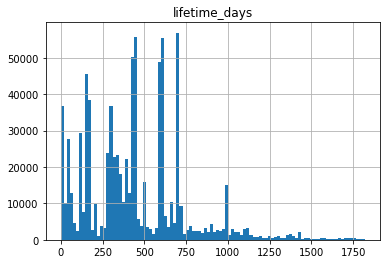

In [66]:
df_all[df_all['lifetime_days'] < years_five].hist(column='lifetime_days', bins=100)

In [73]:
df_all.head(2)

,num,filetype,extension,blocks,birthtime,alive_for_periods,is_dead,blocksize_category,lifetime,lifetime_days,alive_for_minutes
0,0,/Users/jun/.DS_Store,NaN,56,1.482045e+09,530,False,11-100,38505247.0,445.662581,1440.0
1,1,/Users/jun/.CFUserTextEncoding,NaN,8,1.482102e+09,530,False,1-10,38447553.0,444.994826,1440.0


We can see there are a number of files reported by the file system to have birthtime equal or close to 0 (Unix timestamp 0). These greatly skewed our data and investigating their age--as reported by the OS or trying to find out their real age on disk, since they clearly were not created in the 1970s--is beyond the scope of this exploration. We choose to exclude them from our dataset. Notice, however, that there are a significant number of files with birthtime 0.

In [117]:
print('files close to timestamp 0: %d' % len(df_all[df_all['lifetime_days'] >= (years_unix_0 - 10000)]))
print('files over 10 years old: %d' % len(df_all[df_all['lifetime_days'] >= years_ten]))
print('files over 5 years old: %d' % len(df_all[df_all['lifetime_days'] >= years_five]))

files close to timestamp 0: 449
files over 10 years old: 1844
files over 5 years old: 4994


So from now on, we will work with only those files that have ages < 2.5 years, a number we chose based on an approximation of when we installed the operating system on our machines.

In [74]:
df_clean = df_all[df_all['lifetime_days'] < years_twoandahalf]
len(df_clean)

771473

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x141c40278>]],
      dtype=object)

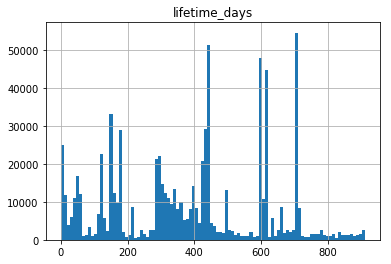

In [81]:
df_clean.hist(column=TOTAL_LIFETIME_DAYS_COL, bins=100)

In [84]:
df_deleted = df_clean[df_clean[IS_DEAD_COL] == True]
print(len(df_deleted))
df_created_and_deleted = df_deleted[df_deleted[BIRTHTIME_COL] > start_time]
print(len(df_created_and_deleted))
df_not_created_and_deleted = df_deleted[~df_deleted.index.isin(df_created_and_deleted.index)]
print(len(df_not_created_and_deleted))

18522
16230
2292


We explore the Jun dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13a6fd2e8>]],
      dtype=object)

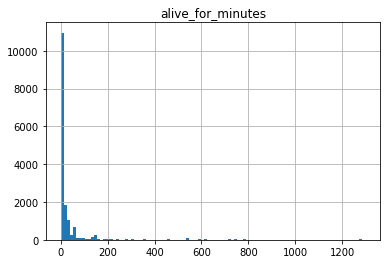

In [86]:
df_created_and_deleted.hist(column=ALIVE_OBSERVED_MINUTES_COL, bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130219780>]],
      dtype=object)

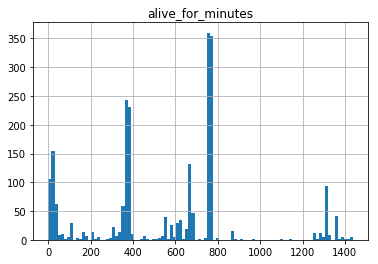

In [87]:
df_not_created_and_deleted.hist(column=ALIVE_OBSERVED_MINUTES_COL, bins=100)

Now, we explore the Juan dataset. To do this, we redefine our previous dataframe variables for convenience.

In [119]:
DATASET = 'jun'  # 'juan' or 'jun'
FILENAME = 'data/test_%s.tsv' % DATASET
preprocessed_fname = FILENAME + PREPROCESSED_SUFFIX

# Get the main dataframe
df_all = get_dataframe(state_process, preprocessed_fname)
len(df_all) # sanity check

848505

In [96]:
# Define all the dataframes
df_clean = df_all[df_all['lifetime_days'] < years_twoandahalf]
len(df_clean)

df_deleted = df_clean[df_clean[IS_DEAD_COL] == True]
print(len(df_deleted))
df_created_and_deleted = df_deleted[df_deleted[BIRTHTIME_COL] > start_time]
print(len(df_created_and_deleted))
df_not_created_and_deleted = df_deleted[~df_deleted.index.isin(df_created_and_deleted.index)]
print(len(df_not_created_and_deleted))

32597
12798
19799


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13d4ebc50>]],
      dtype=object)

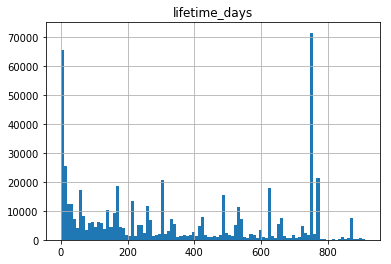

In [97]:
df_clean.hist(column=TOTAL_LIFETIME_DAYS_COL, bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13d194668>]],
      dtype=object)

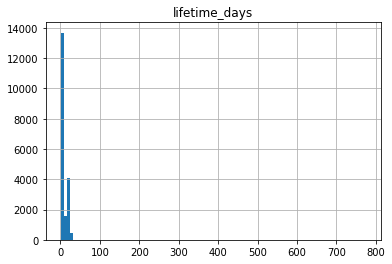

In [98]:
df_not_created_and_deleted.hist(column=TOTAL_LIFETIME_DAYS_COL, bins=100)

In [ ]:
df_created_and_deleted.hist(column=ALIVE_OBSERVED_MINUTES_COL, bins=100)

